In [59]:
import google.auth
import pandas as pd
import pandas_gbq
import seaborn as sns

In [2]:
def read_bigquery(dataset: str, table_name: str):
    credentials, project_id = google.auth.default()
    df = pandas_gbq.read_gbq('select * from `{}.{}.{}`'.format(project_id, dataset, table_name),
                             project_id=project_id,
                             credentials=credentials,
                             location='europe-west3')

    return df

In [3]:
df = read_bigquery('footy_data_warehouse', 'total_result_check')

Downloading: 100%|███████████████████████████████████████████████████████████████████████████████████████| 63/63 [00:00<00:00, 357.11rows/s]


In [11]:
df

,match_id,date_GMT,status,home_team_name,away_team_name,real_result,possible_win,predicted_results
0,305,May 14 2022 - 1:30pm,complete,Arminia Bielefeld,RB Leipzig,2.0,0,3.0
1,304,May 14 2022 - 1:30pm,complete,Augsburg,Greuther Fürth,3.0,0,1.0
2,299,May 14 2022 - 1:30pm,complete,Bayer Leverkusen,Freiburg,3.0,26,3.0
3,297,May 14 2022 - 1:30pm,complete,Borussia Dortmund,Hertha BSC,3.0,14,3.0
4,301,May 14 2022 - 1:30pm,complete,Borussia M'gladbach,Hoffenheim,3.0,0,1.0
...,...,...,...,...,...,...,...,...
58,257,Apr 09 2022 - 4:30pm,complete,Hertha BSC,Union Berlin,1.0,0,3.0
59,255,Apr 09 2022 - 1:30pm,complete,Köln,Mainz 05,3.0,25,3.0
60,260,Apr 10 2022 - 5:30pm,complete,RB Leipzig,Hoffenheim,3.0,15,3.0
61,252,Apr 08 2022 - 6:30pm,complete,Stuttgart,Borussia Dortmund,1.0,0,3.0


In [24]:
print(
    f"Betting 10 EUR per game, total profit for {int(len(df)/9)} games would have been: {df.possible_win.sum()-(len(df)*10)} EUR"
)

Betting 10 EUR per game, total profit for 7 games would have been: 71 EUR


In [38]:
l_real_result = list(df.real_result.value_counts())

In [6]:
df_correct_bet = df[df['possible_win']!=0]

In [36]:
l_correct_bet=list(df_correct_bet.real_result.value_counts())
l_correct_bet.append(0)

In [46]:
share_3 = l_correct_bet[0] / l_real_result[0]
share_1 = l_correct_bet[1] / l_real_result[1]
share_2 = l_correct_bet[2] / l_real_result[2]

In [71]:
df_bet_ratio = pd.DataFrame.from_dict(
    {"match_type" :["c_homewin","c_awaywin", "c_draw"],  "success_ratio" :[share_3,  share_1, share_2]}
)

In [72]:
df_bet_ratio.set_index("match_type", inplace=True)

In [73]:
sns.set(style='whitegrid', rc={'figure.figsize':(11.7,8.27)})
sns.set_context('poster')

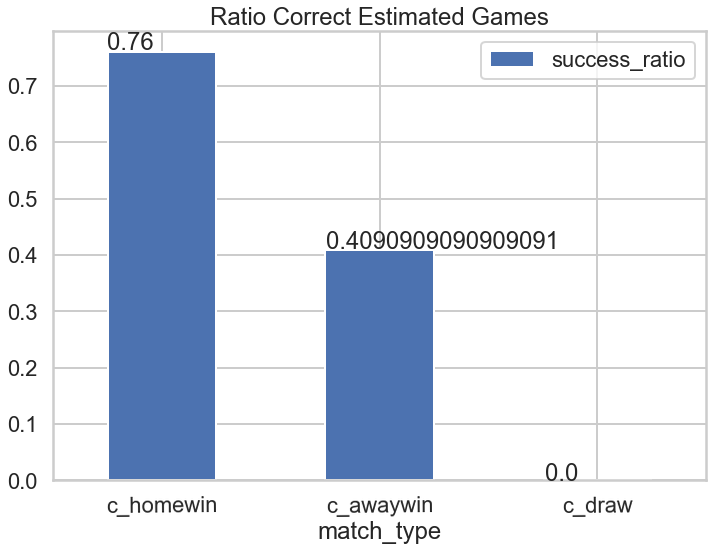

In [101]:
import numpy as np
ax=df_bet_ratio.plot.bar(title="Ratio Correct Estimated Games", rot=.5)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))


In [78]:
l_real_result

[25, 22, 16]

In [79]:
l_correct_bet

[19, 9, 0]

In [81]:
df_bet_ratio_absolut = pd.DataFrame.from_dict(
    {"match_type" :["c_homewin","c_awaywin", "c_draw"], "real_results": l_real_result, "correct_bet" : l_correct_bet}
)
df_bet_ratio_absolut.set_index("match_type", inplace=True)

In [85]:
df_bet_ratio_absolut

,real_results,correct_bet
match_type,,
c_homewin,25,19
c_awaywin,22,9
c_draw,16,0


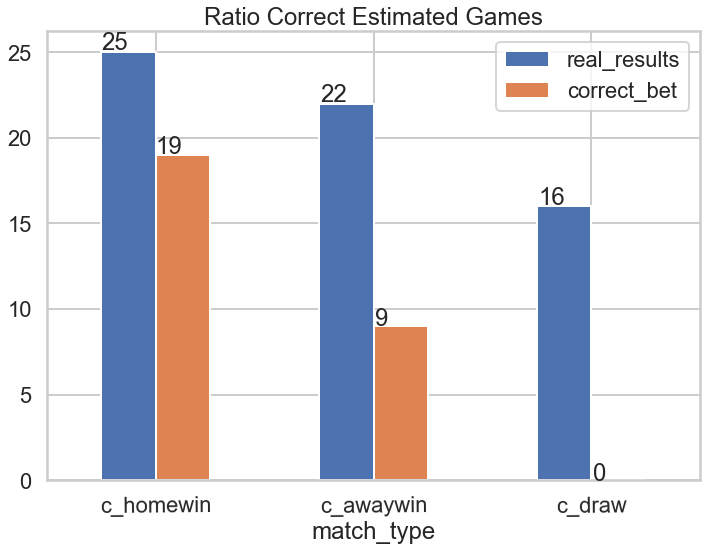

In [99]:
ax = df_bet_ratio_absolut.plot.bar(title="Ratio Correct Estimated Games", rot=.5)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [103]:
df_correct_bet = df[df['possible_win']!=0]

In [120]:
df_correct_bet[df_correct_bet['real_result']==3.0]['home_team_name'].value_counts()

Union Berlin         3
Bayer Leverkusen     2
Borussia Dortmund    2
Köln                 2
Wolfsburg            2
RB Leipzig           2
Stuttgart            1
Bochum               1
Freiburg             1
Mainz 05             1
Augsburg             1
Bayern München       1
Name: home_team_name, dtype: int64

In [117]:
df_correct_bet[df_correct_bet['real_result']==1.0]['away_team_name'].value_counts()

RB Leipzig           2
Bayer Leverkusen     1
Union Berlin         1
Borussia Dortmund    1
Wolfsburg            1
Bayern München       1
Bochum               1
Freiburg             1
Name: away_team_name, dtype: int64

In [129]:
print(
    f"Share of games predicted correctly and at least doubled the initial bet (10 EUR) {len(df_correct_bet[df_correct_bet['possible_win'] > 20].sort_values('possible_win', ascending=False))/ len(df_correct_bet) * 100} %"
)

Share of games predicted correctly and at least doubled the initial bet (10 EUR) 50.0 %


In [132]:
df_draw = df[df['real_result']==2]

In [133]:
df_draw

,match_id,date_GMT,status,home_team_name,away_team_name,real_result,possible_win,predicted_results
0,305,May 14 2022 - 1:30pm,complete,Arminia Bielefeld,RB Leipzig,2.0,0,3.0
5,303,May 14 2022 - 1:30pm,complete,Mainz 05,Eintracht Frankfurt,2.0,0,3.0
8,298,May 14 2022 - 1:30pm,complete,Wolfsburg,Bayern München,2.0,0,1.0
11,272,Apr 23 2022 - 1:30pm,complete,Eintracht Frankfurt,Hoffenheim,2.0,0,3.0
12,273,Apr 23 2022 - 1:30pm,complete,Freiburg,Borussia M'gladbach,2.0,0,3.0
18,295,May 08 2022 - 3:30pm,complete,Bayern München,Stuttgart,2.0,0,3.0
20,294,May 08 2022 - 1:30pm,complete,Eintracht Frankfurt,Borussia M'gladbach,2.0,0,1.0
33,268,Apr 17 2022 - 3:30pm,complete,Hoffenheim,Greuther Fürth,2.0,0,3.0
34,263,Apr 16 2022 - 1:30pm,complete,Mainz 05,Stuttgart,2.0,0,3.0
36,284,Apr 30 2022 - 1:30pm,complete,Arminia Bielefeld,Hertha BSC,2.0,0,3.0


# TODO: Improve betting Results for DRAWS